In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


## Data Processing

In [2]:
df_andriod = pd.read_csv('Android Phones.csv')
df_andriod.head()

,Name,Brand,Release,Version
0,BlackBerry Priv,BlackBerry Limited,2015/11,Android 5.0 Lollipop
1,BlackBerry DTEK50,BlackBerry Limited,2016/08,Android 6.0 Marshmallow
2,BlackBerry DTEK60,BlackBerry Limited,2016/10,Android 6.0 Marshmallow
3,BlackBerry Aurora,BlackBerry Mobile,2017/03,Android 7.0 Nougat
4,BlackBerry KeyOne,BlackBerry Mobile,2017/04,Android 7.0 Nougat


In [3]:
df_andriod.isna().sum()

Name       0
Brand      0
Release    7
Version    0
dtype: int64

In [4]:
df_andriod['Release'].replace(np.nan, 'UNKNOWN', inplace=True)

In [5]:
df_andriod.dtypes

Name       object
Brand      object
Release    object
Version    object
dtype: object

In [6]:
year = []
month = []
def get_date(x):
    x = x.split('/')
    year.append(x[0])
    try:
        month.append(x[1])
    except:
        month.append('Unreleased')
df_andriod['Release'].apply(lambda x : get_date(x) )

0       None
1       None
2       None
3       None
4       None
        ... 
1327    None
1328    None
1329    None
1330    None
1331    None
Name: Release, Length: 1332, dtype: object

In [7]:
df_andriod['Year'] = year
df_andriod['Month'] = month

## Data Cleaning

In [8]:
df_andriod.drop('Release', inplace=True, axis=1)
df_andriod.drop_duplicates()

,Name,Brand,Version,Year,Month
0,BlackBerry Priv,BlackBerry Limited,Android 5.0 Lollipop,2015,11
1,BlackBerry DTEK50,BlackBerry Limited,Android 6.0 Marshmallow,2016,08
2,BlackBerry DTEK60,BlackBerry Limited,Android 6.0 Marshmallow,2016,10
3,BlackBerry Aurora,BlackBerry Mobile,Android 7.0 Nougat,2017,03
4,BlackBerry KeyOne,BlackBerry Mobile,Android 7.0 Nougat,2017,04
...,...,...,...,...,...
1327,ZTE Axon 30,ZTE,Android 11,2021,08
1328,ZTE Blade A71,ZTE,Android 11,2021,10
1329,ZTE Blade L9,ZTE,Android 11,2021,10
1330,ZTE Blade A31 Plus,ZTE,Android 11,2021,10


## Data Visulatization

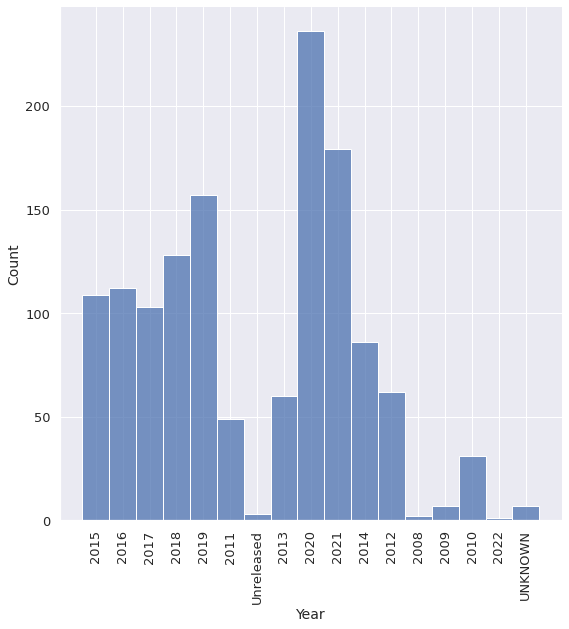

In [9]:

sns.displot(data=df_andriod, x='Year', height=8)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show();

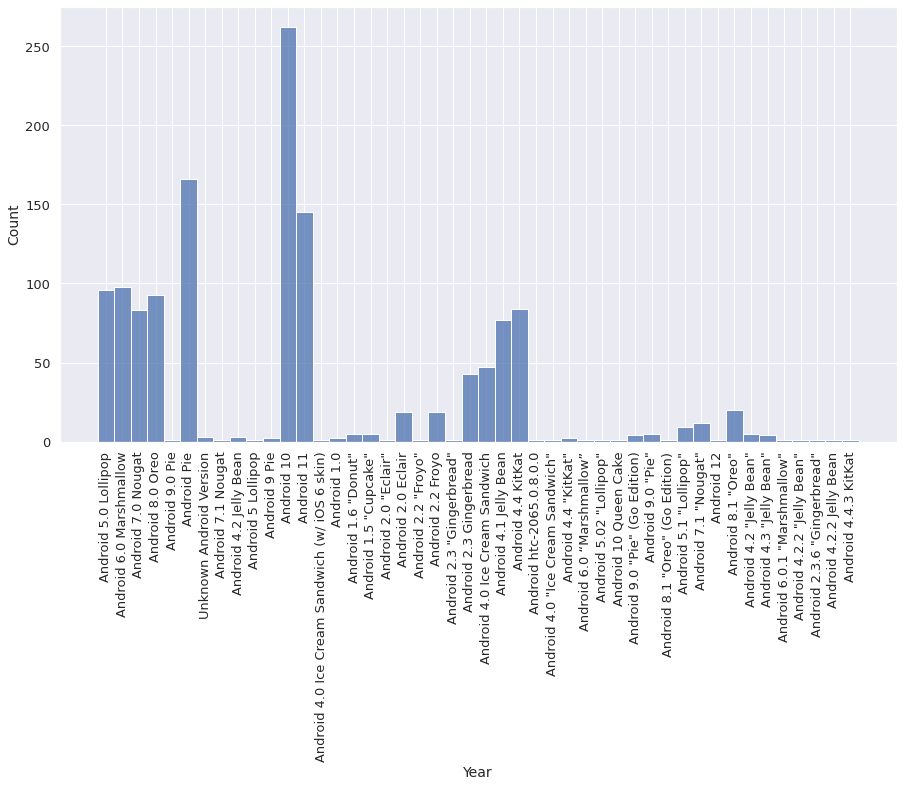

In [10]:
plt.figure(figsize=(15,8))
sns.histplot(data = df_andriod, x='Version')
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show();

### How many phones use Android 11 ?

In [11]:
df_andriod.Version.value_counts()['Android 11']

145

### Which phones were released the latest ?

In [12]:
# 2022 phones

df_andriod[['Name', 'Year']].groupby('Year').agg(['unique'])['Name']['unique']['2022'].item()

'Honor Play 30 Plus'

In [13]:
# 2021 phones

df_andriod[['Name', 'Year']].groupby('Year').agg(['unique'])['Name']['unique']['2021']

array(['Fairphone 4', 'Freedom Phone', 'HTC Desire 21 Pro',
       'HTC Wildfire E3', 'Honor V40', 'Honor V40 Lite',
       'Honor Play 5T Youth', 'Honor Play 20', 'Honor Play 5',
       'Honor 50/Pro', 'Honor 50 SE', 'Honor X20 SE', 'Honor Play 5T Pro',
       'Honor Magic3/Pro/Pro+', 'Honor X20', 'Honor Play 5 Youth',
       'Honor 50 Lite', 'Honor X30 Max/X30i', 'Honor 60/Pro', 'Honor X30',
       'Huawei Mate X2', 'Huawei Nova 8 Pro 4G', 'Huawei Nova 8i',
       'Huawei Nova 8 SE Youth', 'Huawei Nova 9', 'Huawei Enjoy 20e',
       'Lenovo Legion 2 Pro', 'Lenovo Legion Duel 2', 'LG W41/+/Pro',
       'Meizu 18/Pro', 'Meizu 18s/Pro', 'Meizu 18X', 'Mode Phone MP1',
       'Moto G Play (2021)', 'Moto G Power (2021)',
       'Moto G Stylus (2021)', 'Moto E6i', 'Moto E7 Power', 'Moto G10',
       'Moto G30', 'Moto G10 Power', 'Moto G50', 'Moto G100', 'Moto G60',
       'Moto G40 Fusion', 'Moto G20', 'Moto G Stylus 5G',
       'Motorola Defy (2021)', 'Moto G50 5G', 'Moto G60S',
       'Mo

### Which brand has the most phones released ?

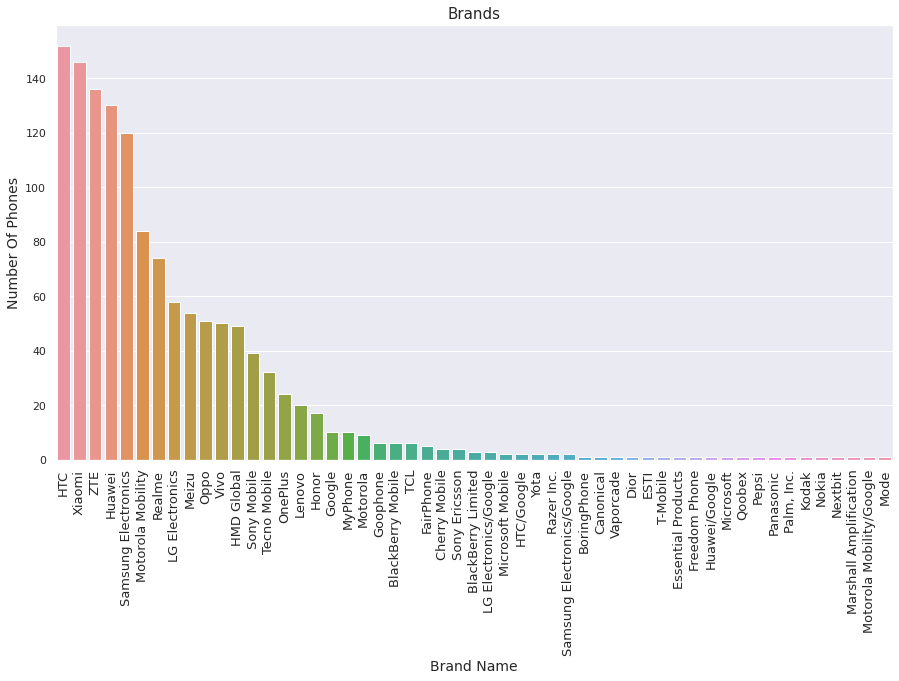

In [14]:
Brands = df_andriod[['Name', 'Brand']].groupby('Brand').agg(['count'])['Name']['count'].sort_values(ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(x=Brands.index, y=Brands.values)
plt.xticks(rotation=90, fontsize=13)
plt.title('Brands', fontsize=15)
plt.xlabel('Brand Name', fontsize=14)
plt.ylabel('Number Of Phones', fontsize=14)
plt.show();

### How many brands are there?

In [15]:
#brands name

df_andriod.Brand.unique()

array(['BlackBerry Limited', 'BlackBerry Mobile', 'BoringPhone',
       'Cherry Mobile', 'Dior', 'Essential Products', 'ESTI', 'FairPhone',
       'Freedom Phone', 'Goophone', 'HTC', 'HTC/Google', 'Huawei',
       'Honor', 'Vaporcade', 'Kodak', 'Lenovo', 'LG Electronics',
       'Marshall Amplification', 'Meizu', 'Mode', 'Motorola',
       'Motorola Mobility', 'MyPhone', 'Nextbit',
       'Samsung Electronics/Google', 'LG Electronics/Google',
       'Motorola Mobility/Google', 'Huawei/Google', 'Nokia',
       'Microsoft Mobile', 'HMD Global', 'ZTE', 'OnePlus', 'Oppo',
       'Palm, Inc.', 'Panasonic', 'Pepsi', 'Google', 'Qoobex',
       'Razer Inc.', 'Realme', 'Xiaomi', 'Samsung Electronics',
       'Sony Mobile', 'Microsoft', 'Sony Ericsson', 'T-Mobile', 'TCL',
       'Tecno Mobile', 'Canonical', 'Vivo', 'Yota'], dtype=object)

In [16]:
#number of brands

df_andriod.Brand.unique().__len__()

53